In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
 
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import RandomForestClassifier


from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve,recall_score
from sklearn import tree


# For tuning the model
from sklearn.model_selection import GridSearchCV

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
data = pd.read_csv(r'https://raw.githubusercontent.com/azaz6216/dataset/refs/heads/main/CSE_student_performances.csv')
df = data.copy()
dfC = data.copy()
print(df.head())


   Age   Gender AcademicPerformance TakingNoteInClass DepressionStatus  \
0    23    Male             Average                No        Sometimes   
1    23    Male           Excellent         Sometimes              Yes   
2    24    Male             Average                No        Sometimes   
3    20  Female                Good               Yes        Sometimes   
4    24  Female             Average               Yes              Yes   

  FaceChallangesToCompleteAcademicTask LikePresentation  SleepPerDayHours  \
0                                  Yes              Yes                12   
1                                   No              Yes                 8   
2                            Sometimes               No                 8   
3                                  Yes               No                 5   
4                                  Yes              Yes                 5   

   NumberOfFriend LikeNewThings  
0             NaN           Yes  
1            80.0       

In [3]:
print("Sum of nulls: \n",df.isnull().sum())
print("Description: \n",df.describe())
print("Sum of duplicates:\n",df.duplicated())

Sum of nulls: 
 Age                                     0
Gender                                  0
AcademicPerformance                     0
TakingNoteInClass                       0
DepressionStatus                        0
FaceChallangesToCompleteAcademicTask    0
LikePresentation                        0
SleepPerDayHours                        0
NumberOfFriend                          4
LikeNewThings                           0
dtype: int64
Description: 
             Age   SleepPerDayHours  NumberOfFriend
count  99.000000         99.000000       95.000000
mean   22.515152          6.717172       16.189474
std     1.560767          1.738169       25.397811
min    20.000000          4.000000        0.000000
25%    21.000000          5.000000        3.000000
50%    23.000000          7.000000        6.000000
75%    24.000000          8.000000       15.000000
max    25.000000         12.000000      100.000000
Sum of duplicates:
 0     False
1     False
2     False
3     False
4     Fal

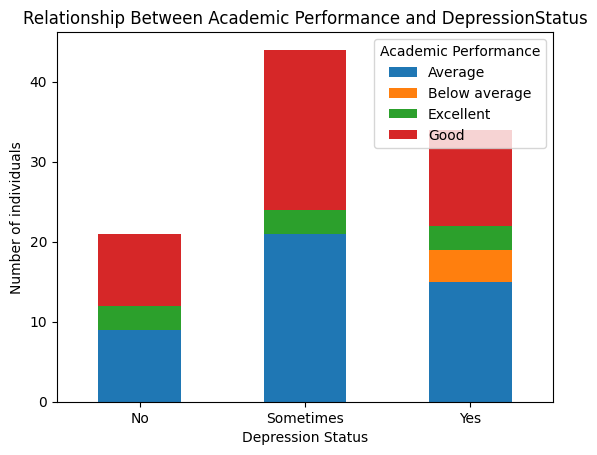

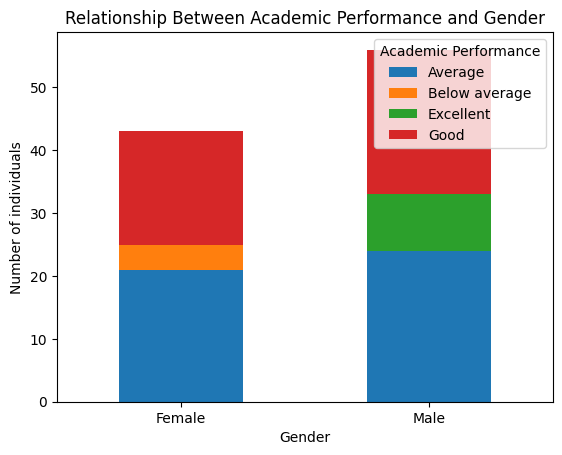

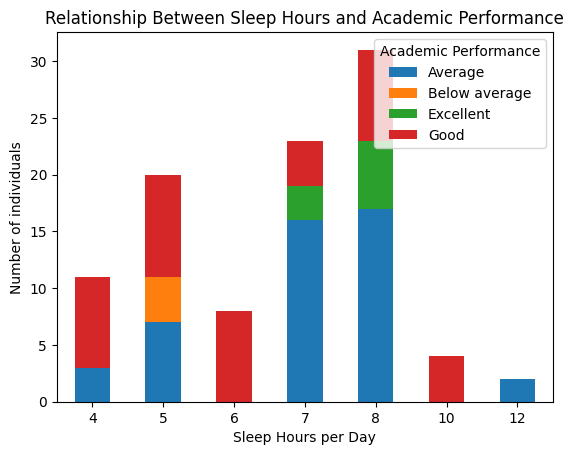

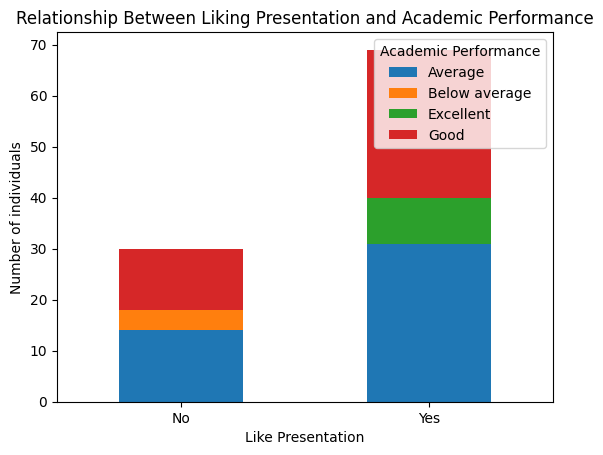

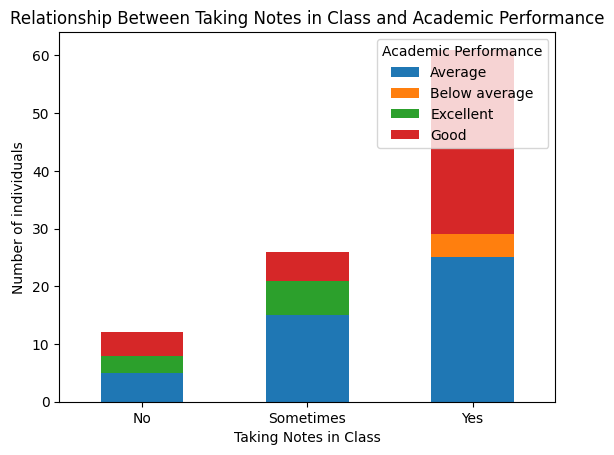

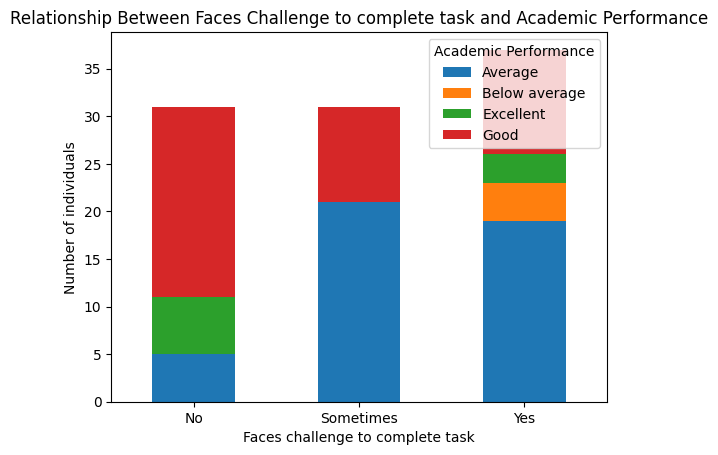

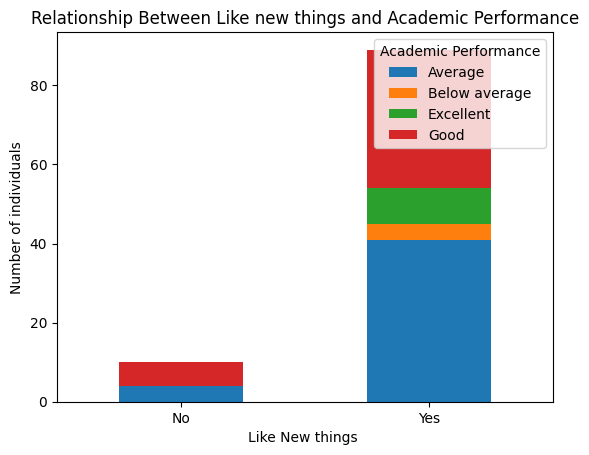

In [21]:
data = df.groupby(['DepressionStatus', 'AcademicPerformance']).size().unstack()
data.plot(kind='bar', stacked=True)
plt.title('Relationship Between Academic Performance and DepressionStatus')
plt.xlabel('Depression Status')
plt.ylabel('Number of individuals')
plt.legend(title='Academic Performance', loc='upper right')
plt.xticks(rotation=0)
plt.show()

data = df.groupby(['Gender', 'AcademicPerformance']).size().unstack()
data.plot(kind='bar', stacked=True)
plt.title('Relationship Between Academic Performance and Gender')
plt.xlabel('Gender')
plt.ylabel('Number of individuals')
plt.legend(title='Academic Performance', loc='upper right')
plt.xticks(rotation=0)
plt.show()




data = df.groupby(['SleepPerDayHours', 'AcademicPerformance']).size().unstack()
data.plot(kind='bar', stacked=True)
plt.title('Relationship Between Sleep Hours and Academic Performance')
plt.xlabel('Sleep Hours per Day')
plt.ylabel('Number of individuals')
plt.legend(title='Academic Performance', loc='upper right')
plt.xticks(rotation=0)
plt.show()

data = df.groupby(['LikePresentation', 'AcademicPerformance']).size().unstack()
data.plot(kind='bar', stacked=True)
plt.title('Relationship Between Liking Presentation and Academic Performance')
plt.xlabel('Like Presentation')
plt.ylabel('Number of individuals')
plt.legend(title='Academic Performance', loc='upper right')
plt.xticks(rotation=0)
plt.show()

data1 = df.groupby(['TakingNoteInClass', 'AcademicPerformance']).size().unstack()


data1.plot(kind='bar', stacked=True)


plt.title('Relationship Between Taking Notes in Class and Academic Performance')
plt.xlabel('Taking Notes in Class')
plt.ylabel('Number of individuals')
plt.legend(title='Academic Performance', loc='upper right')
plt.xticks(rotation=0)

plt.show()

data = df.groupby(['FaceChallangesToCompleteAcademicTask', 'AcademicPerformance']).size().unstack()
data.plot(kind='bar', stacked=True)
plt.title('Relationship Between Faces Challenge to complete task and Academic Performance')
plt.xlabel('Faces challenge to complete task')
plt.ylabel('Number of individuals')
plt.legend(title='Academic Performance', loc='upper right')
plt.xticks(rotation=0)
plt.show()

data = df.groupby(['LikeNewThings', 'AcademicPerformance']).size().unstack()
data.plot(kind='bar', stacked=True)
plt.title('Relationship Between Like new things and Academic Performance')
plt.xlabel('Like New things ')
plt.ylabel('Number of individuals')
plt.legend(title='Academic Performance', loc='upper right')
plt.xticks(rotation=0)
plt.show()

In [6]:
Y = df[['Age ', 'SleepPerDayHours', "NumberOfFriend",'FaceChallangesToCompleteAcademicTask', 'Gender', 'AcademicPerformance', 'TakingNoteInClass', 'LikePresentation', 'DepressionStatus','LikeNewThings']]
for i in Y:
    print(df[i].value_counts())
X = df[['FaceChallangesToCompleteAcademicTask', 'Gender', 'AcademicPerformance', 'TakingNoteInClass', 'LikePresentation', 'DepressionStatus','LikeNewThings']]

Age 
21    30
24    20
23    19
25    12
22    11
20     7
Name: count, dtype: int64
SleepPerDayHours
8     31
7     23
5     20
4     11
6      8
10     4
12     2
Name: count, dtype: int64
NumberOfFriend
3.0      18
2.0       9
7.0       9
4.0       7
6.0       7
15.0      5
12.0      5
1.0       4
23.0      4
9.0       4
100.0     4
0.0       4
17.0      3
55.0      3
60.0      3
10.0      3
80.0      3
Name: count, dtype: int64
FaceChallangesToCompleteAcademicTask
Yes          37
No           31
Sometimes    31
Name: count, dtype: int64
Gender
Male      56
Female    43
Name: count, dtype: int64
AcademicPerformance
Average          45
Good             41
Excellent         9
Below average     4
Name: count, dtype: int64
TakingNoteInClass
Yes          61
Sometimes    26
No           12
Name: count, dtype: int64
LikePresentation
Yes    69
No     30
Name: count, dtype: int64
DepressionStatus
Sometimes    44
Yes          34
No           21
Name: count, dtype: int64
LikeNewThings
Yes    8

In [7]:
print(df.LikeNewThings.value_counts())

LikeNewThings
Yes    89
No     10
Name: count, dtype: int64


# Bivariate analysis

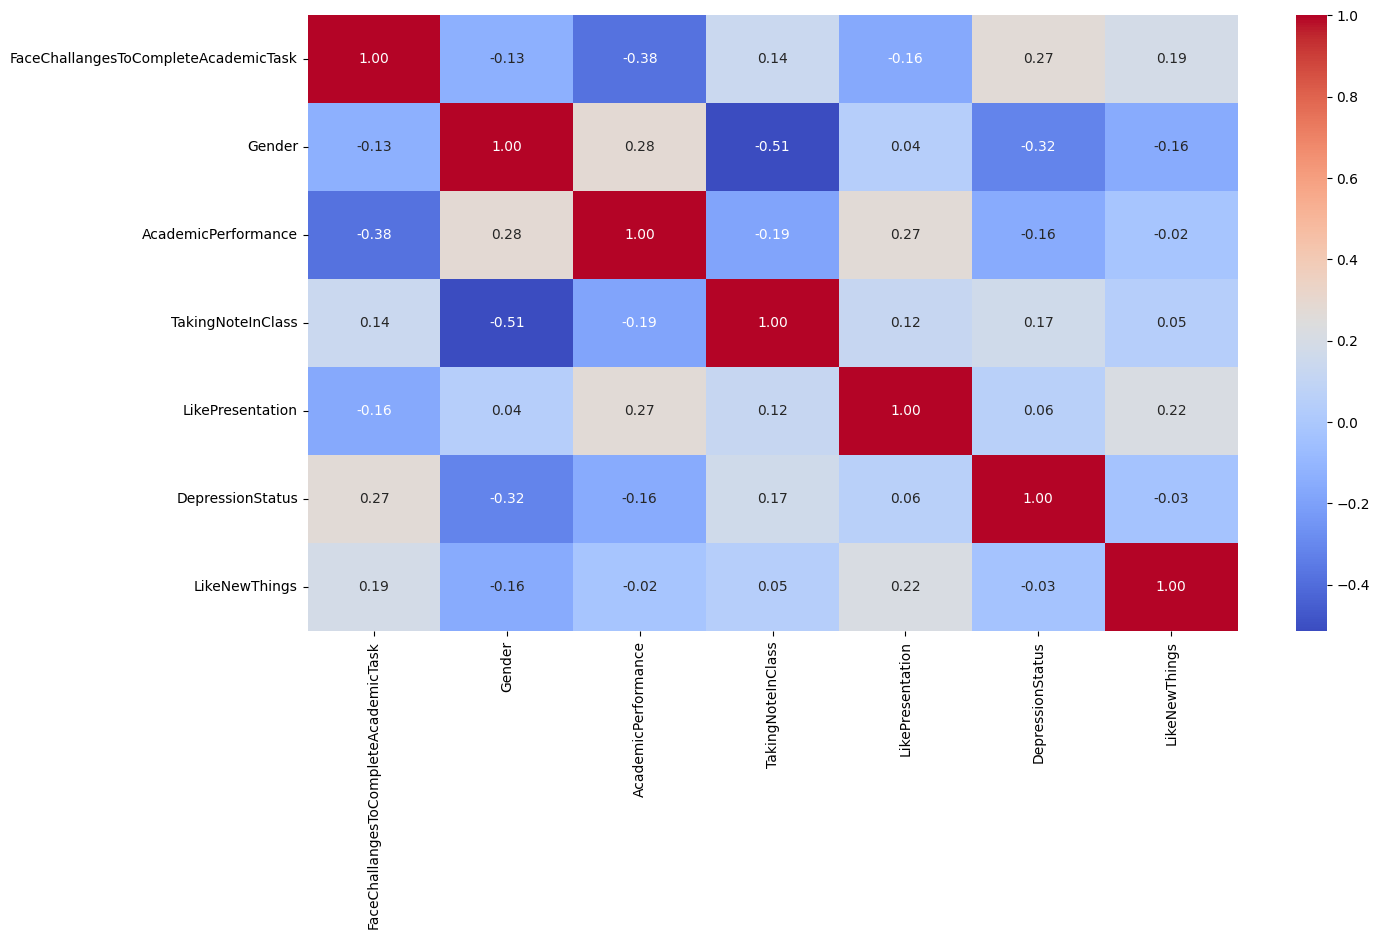

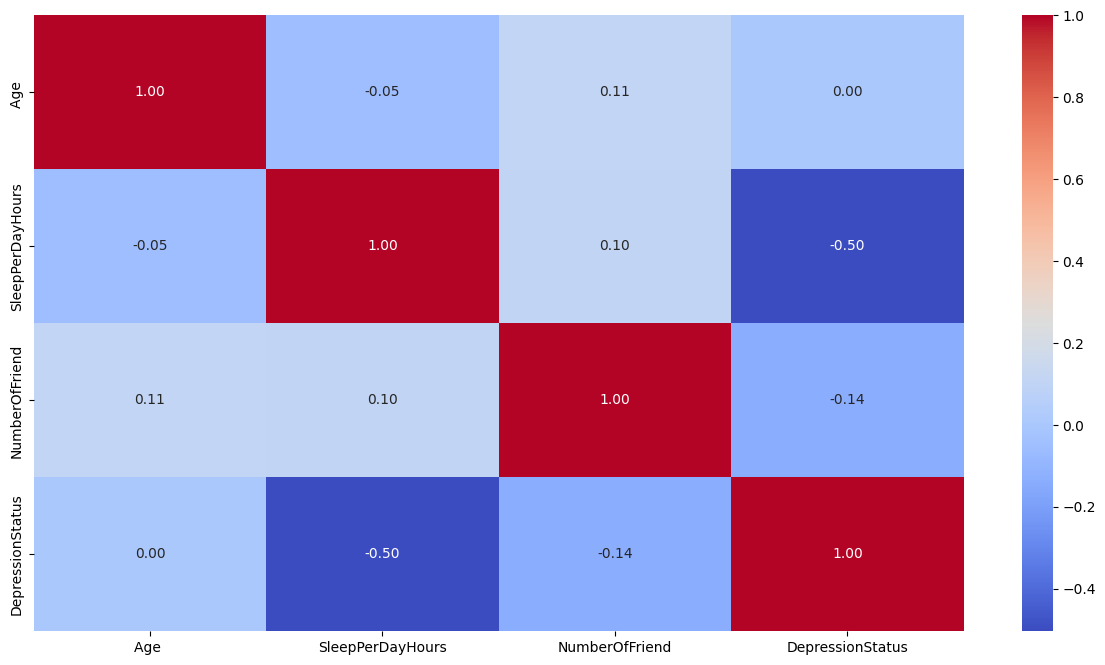

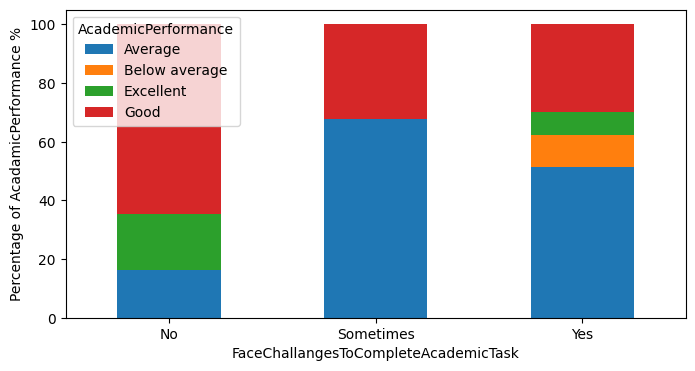

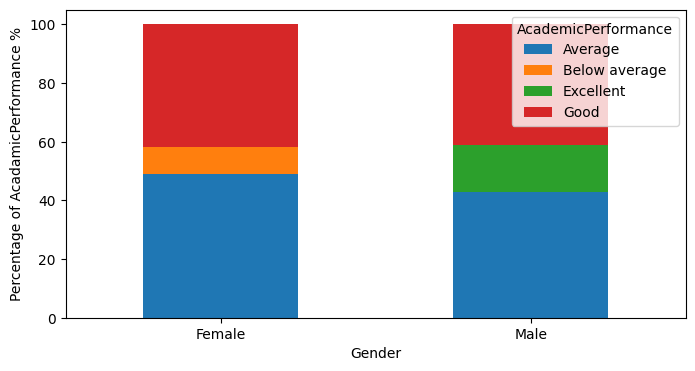

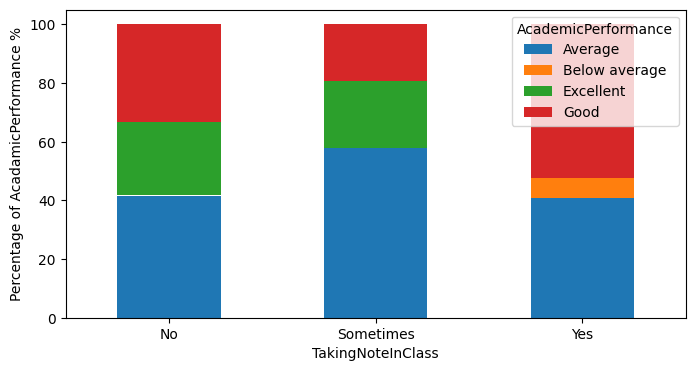

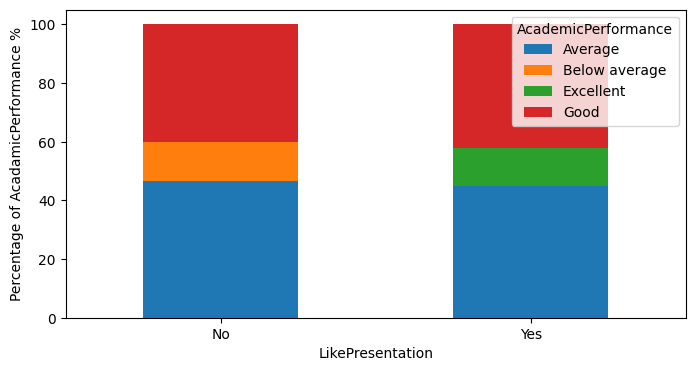

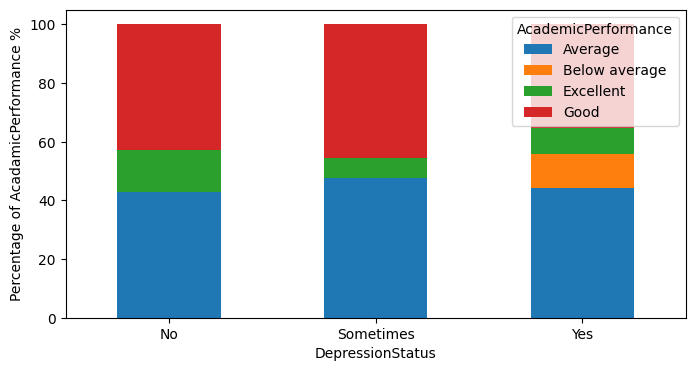

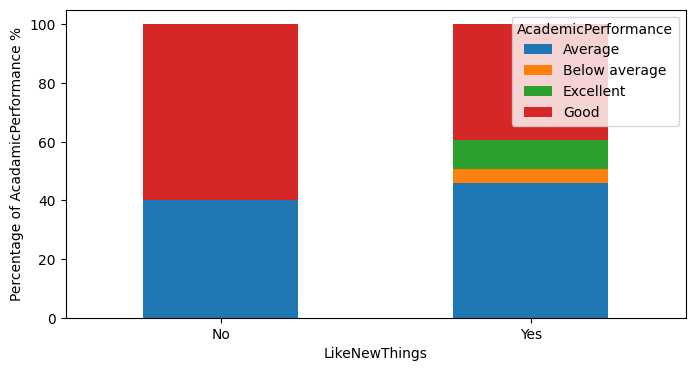

In [23]:
Numeric = df[["Age ",   "SleepPerDayHours","NumberOfFriend"]]
df1 = pd.DataFrame([])
df1['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df1['AcademicPerformance'] = df['AcademicPerformance'].map({'Below average': 0, 'Average': 1, 'Good': 2, 'Excellent': 3})
df1['TakingNoteInClass'] = df['TakingNoteInClass'].map({'No': 0, 'Sometimes': '1', 'Yes': 2})
df1['LikePresentation']= df['LikePresentation'].map({'No': 0, 'Yes': 1})
df1['DepressionStatus'] = df['DepressionStatus'].map({'No': 0, 'Sometimes': 1, 'Yes': 2})
df1['LikeNewThings'] = df['LikeNewThings'].map({'No': 0, 'Yes': 1})
df1[["Age ",   "SleepPerDayHours","NumberOfFriend"]]=df[["Age ",   "SleepPerDayHours","NumberOfFriend"]]
df1['FaceChallangesToCompleteAcademicTask'] = df['FaceChallangesToCompleteAcademicTask'].map({'No': 0, 'Sometimes': '1', 'Yes': 2})
X = df1[['FaceChallangesToCompleteAcademicTask', 'Gender', 'AcademicPerformance', 'TakingNoteInClass', 'LikePresentation', 'DepressionStatus','LikeNewThings']]
plt.figure(figsize=(15,8))
sns.heatmap(X.corr(),annot=True, fmt='0.2f', cmap='coolwarm')
num_cols = df1[['Age ', 'SleepPerDayHours',  'NumberOfFriend', 'DepressionStatus']]
plt.figure(figsize=(15,8))
sns.heatmap(num_cols.corr(),annot=True, fmt='0.2f', cmap='coolwarm')
plt.show()
for i in X:
    if i!='AcademicPerformance':
        (pd.crosstab(df[i],df['AcademicPerformance'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
        plt.ylabel('Percentage of AcadamicPerformance %')
        plt.xticks(rotation=0)
    


In [9]:
features = ['Age ', 'Gender', 'AcademicPerformance', 'TakingNoteInClass',
            'FaceChallangesToCompleteAcademicTask', 'LikePresentation',
          'LikeNewThings']


for i in features:
    result = (df.groupby([i, 'DepressionStatus'])['DepressionStatus'].count() / len(df) * 100).round(2)
    print(f"\nPercentage of DepressionStatus for {i}:")
    print(result.T)


Percentage of DepressionStatus for Age :
Age   DepressionStatus
20    Sometimes            7.07
21    No                   7.07
      Sometimes            8.08
      Yes                 15.15
22    No                   5.05
      Sometimes            3.03
      Yes                  3.03
23    No                   2.02
      Sometimes           12.12
      Yes                  5.05
24    No                   7.07
      Sometimes            6.06
      Yes                  7.07
25    Sometimes            8.08
      Yes                  4.04
Name: DepressionStatus, dtype: float64

Percentage of DepressionStatus for Gender:
Gender  DepressionStatus
Female  No                   8.08
        Sometimes           10.10
        Yes                 25.25
Male    No                  13.13
        Sometimes           34.34
        Yes                  9.09
Name: DepressionStatus, dtype: float64

Percentage of DepressionStatus for AcademicPerformance:
AcademicPerformance  DepressionStatus
Average  

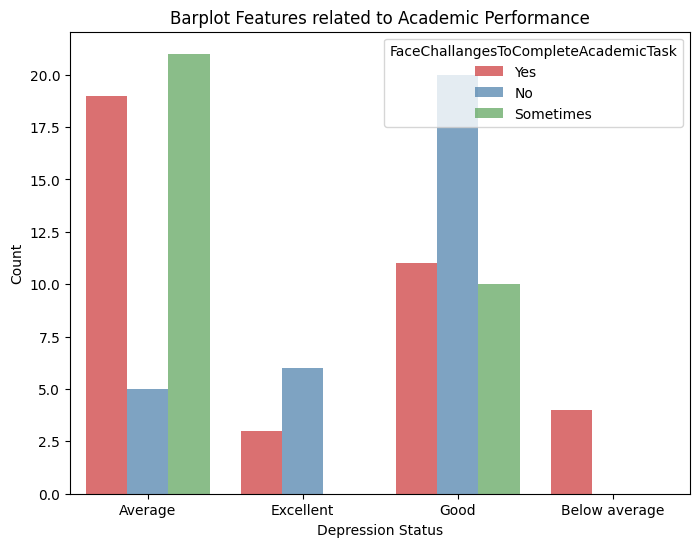

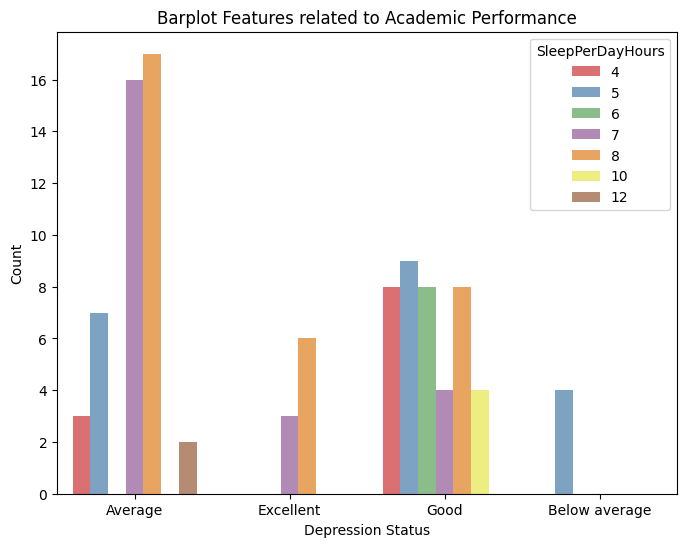

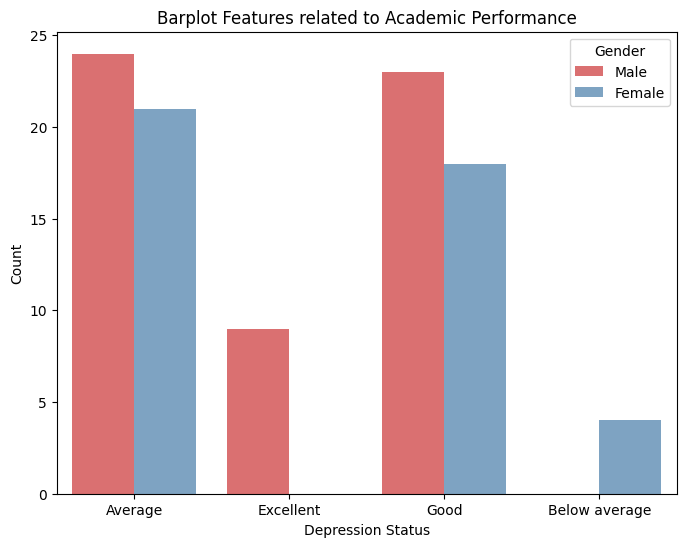

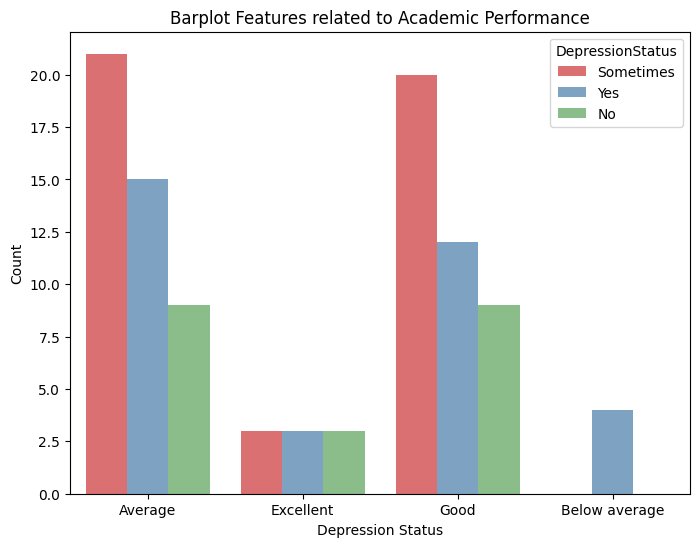

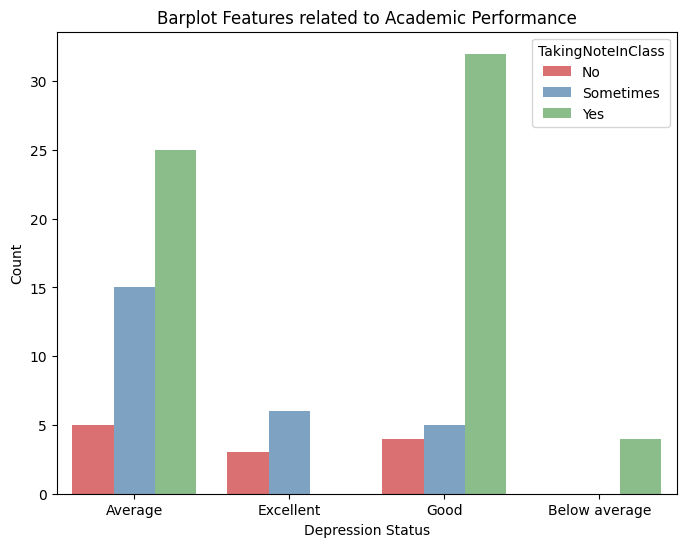

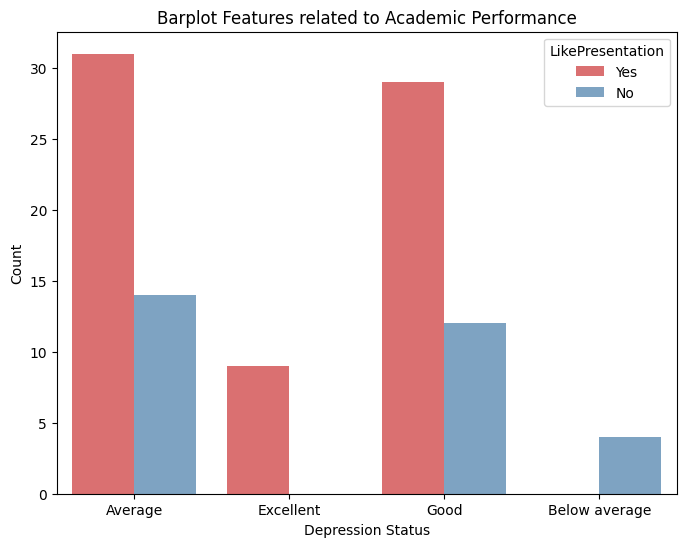

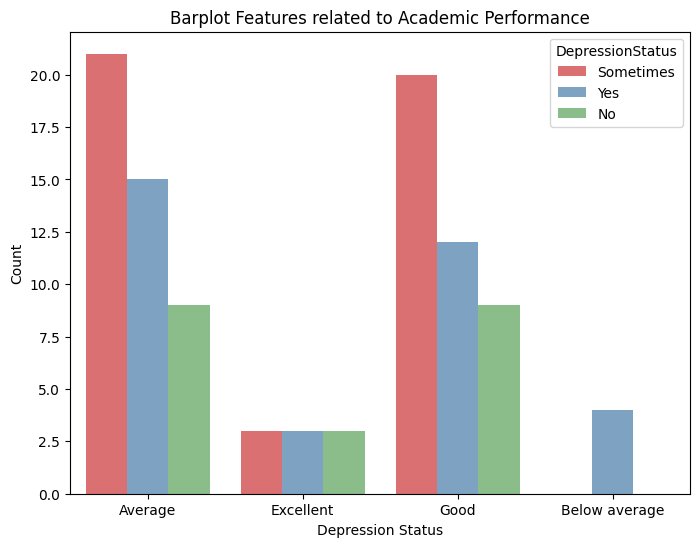

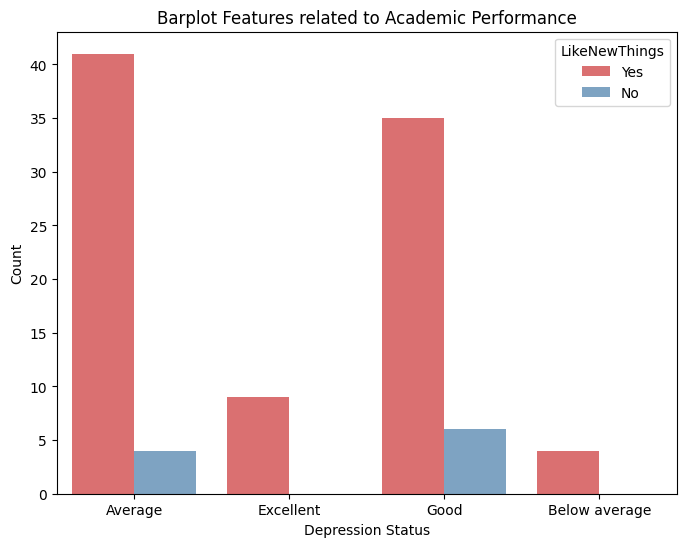

In [25]:

Y = df[['FaceChallangesToCompleteAcademicTask','SleepPerDayHours', 'Gender',  'DepressionStatus','TakingNoteInClass', 'LikePresentation', 'DepressionStatus','LikeNewThings']]

for ft in Y:
    if ft != 'AcademicPerformance':
        plt.figure(figsize=(8, 6))
        sns.countplot(x='AcademicPerformance', hue=ft, data=df, palette='Set1', alpha=0.7)
        plt.title('Barplot Features related to Academic Performance')
        plt.xlabel('Depression Status')
        plt.ylabel('Count')
        plt.legend(title=ft, loc='upper right')
        plt.show() 
        


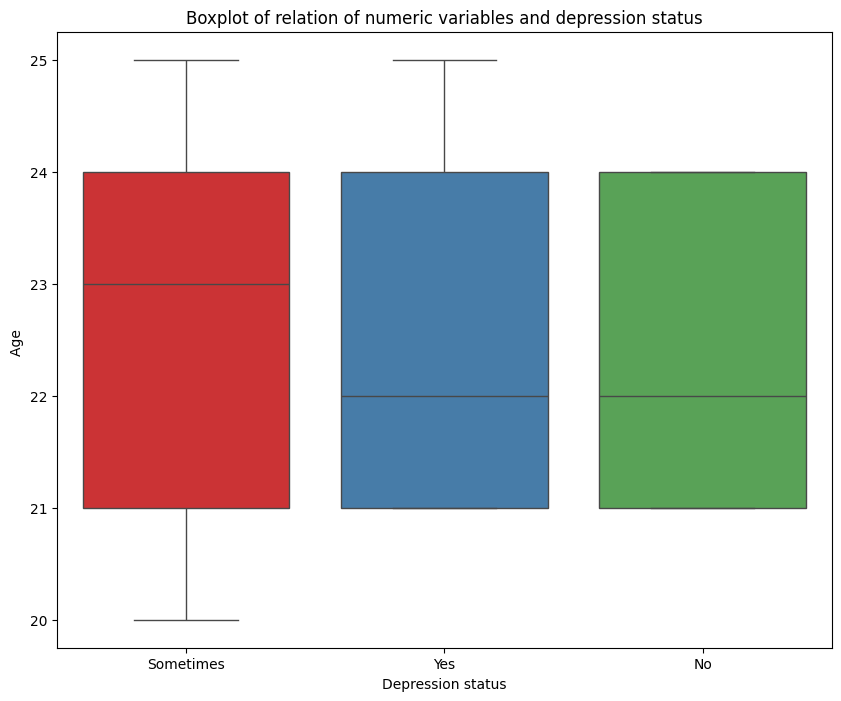

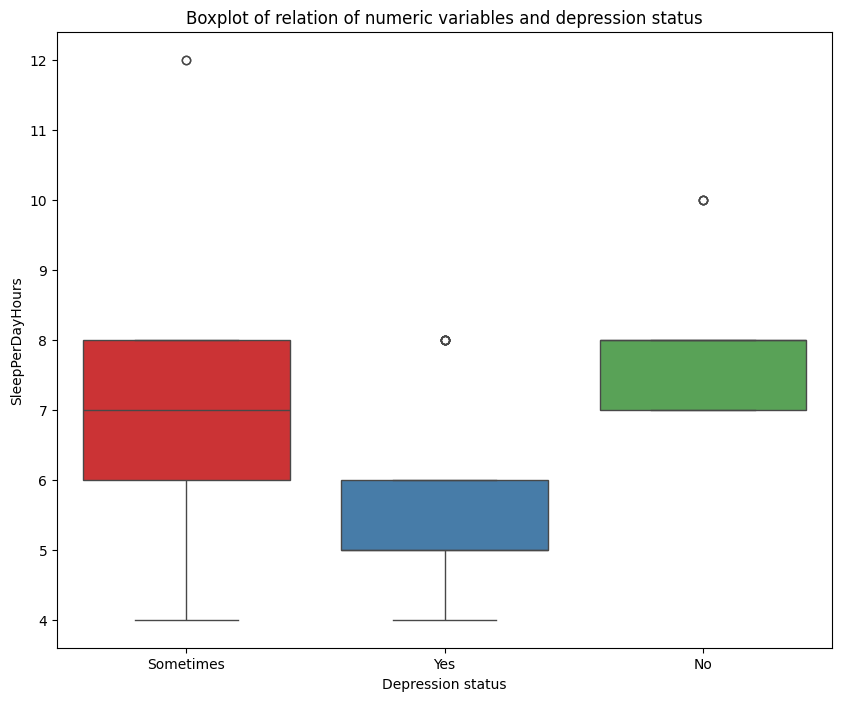

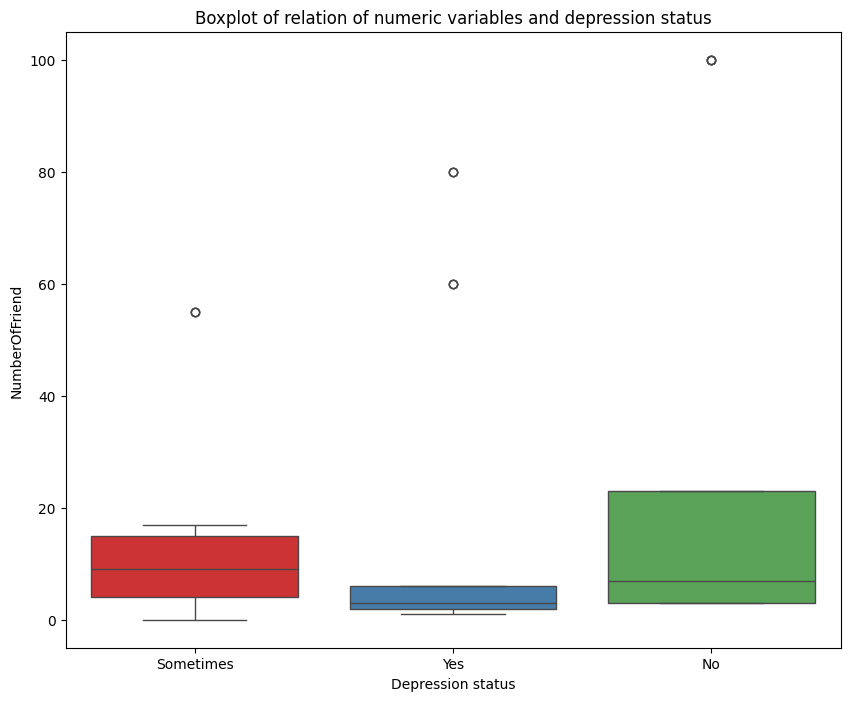

In [11]:
num_cols = ['Age ', 'SleepPerDayHours',  'NumberOfFriend']
for i in num_cols:
    plt.figure(figsize=(10, 8))
    sns.boxplot(x='DepressionStatus', y=i, data=df, palette='Set1')
    plt.title('Boxplot of relation of numeric variables and depression status')
    plt.xlabel('Depression status')
    plt.ylabel(i)
    plt.show()

In [12]:
from scipy.stats import chi2_contingency


categorical_variables = ['AcademicPerformance', 'TakingNoteInClass', 'DepressionStatus',
                          'FaceChallangesToCompleteAcademicTask', 'LikeNewThings']


for i in range(len(categorical_variables) - 1):
    for j in range(i + 1, len(categorical_variables)):
        contingency_table = pd.crosstab(df[categorical_variables[i]], df[categorical_variables[j]])
        chi2, p, _, _ = chi2_contingency(contingency_table)
        print(f"\nChi-square test between {categorical_variables[i]} and {categorical_variables[j]}:")
        print(f"Chi2 value: {chi2}")
        print(f"P-value: {p}")
        print("----------------------------------------------------")
categorical_variables = ['AcademicPerformance', 'TakingNoteInClass', 'DepressionStatus',
                          'FaceChallangesToCompleteAcademicTask', 'LikeNewThings']

df['CombinedCategories'] = df[categorical_variables].astype(str).agg('-'.join, axis=1)


contingency_table = pd.crosstab(index=df['DepressionStatus'], columns=df['CombinedCategories'])

chi2, p, _, _ = chi2_contingency(contingency_table)

print(f"\nChi-square test for overall association:")
print(f"Chi2 value: {chi2}")
print(f"P-value: {p}")

df.drop(columns=['CombinedCategories'], inplace=True)


Chi-square test between AcademicPerformance and TakingNoteInClass:
Chi2 value: 23.210813110653174
P-value: 0.0007288603444379301
----------------------------------------------------

Chi-square test between AcademicPerformance and DepressionStatus:
Chi2 value: 9.109141217462597
P-value: 0.16753244821987098
----------------------------------------------------

Chi-square test between AcademicPerformance and FaceChallangesToCompleteAcademicTask:
Chi2 value: 28.53062283369128
P-value: 7.462683271942466e-05
----------------------------------------------------

Chi-square test between AcademicPerformance and LikeNewThings:
Chi2 value: 2.461298986023569
P-value: 0.4823258408288159
----------------------------------------------------

Chi-square test between TakingNoteInClass and DepressionStatus:
Chi2 value: 10.435287891953756
P-value: 0.03370015312707327
----------------------------------------------------

Chi-square test between TakingNoteInClass and FaceChallangesToCompleteAcademicTask:

In [15]:


categorical_variables1 = ['AcademicPerformance', 'TakingNoteInClass',
                          'FaceChallangesToCompleteAcademicTask', 'LikeNewThings']


df['CombinedCategories'] = df[categorical_variables1].astype(str).agg('-'.join, axis=1)

contingency_table = pd.crosstab(index=df['DepressionStatus'], columns=df['CombinedCategories'])


chi2, p, _, _ = chi2_contingency(contingency_table)

print(f"\nChi-square test for AcademicPerformance-ADHD association:")
print(f"Chi2 value: {chi2}")
print(f"P-value: {p}")


df.drop(columns=['CombinedCategories'], inplace=True)


categorical_variables2 = ['TakingNoteInClass', 'DepressionStatus',
                          'FaceChallangesToCompleteAcademicTask', 'LikeNewThings']


df['CombinedCategories'] = df[categorical_variables2].astype(str).agg('-'.join, axis=1)

contingency_table = pd.crosstab(index=df['DepressionStatus'], columns=df['CombinedCategories'])


chi2, p, _, _ = chi2_contingency(contingency_table)

print(f"\nChi-square test for Depression-ADHD association:")
print(f"Chi2 value: {chi2}")
print(f"P-value: {p}")


df.drop(columns=['CombinedCategories'], inplace=True)

categorical_variables = ['AcademicPerformance', 'TakingNoteInClass', 'DepressionStatus',
                          'FaceChallangesToCompleteAcademicTask', 'LikeNewThings']


df['CombinedCategories'] = df[categorical_variables].astype(str).agg('-'.join, axis=1)


contingency_table = pd.crosstab(index=df['DepressionStatus'], columns=df['CombinedCategories'])

chi2, p, _, _ = chi2_contingency(contingency_table)

print(f"\nChi-square test for overall association:")
print(f"Chi2 value: {chi2}")
print(f"P-value: {p}")


df.drop(columns=['CombinedCategories'], inplace=True)


Chi-square test for AcademicPerformance-ADHD association:
Chi2 value: 114.28030303030303
P-value: 4.4706799461688354e-10

Chi-square test for Depression-ADHD association:
Chi2 value: 198.0
P-value: 2.886234211568071e-24

Chi-square test for overall association:
Chi2 value: 198.00000000000003
P-value: 1.6833385058797988e-19


In [16]:
desired_order = ['Age ', 'Gender', 'AcademicPerformance', 'TakingNoteInClass',
                 'DepressionStatus', 'FaceChallangesToCompleteAcademicTask',
                 'LikePresentation', 'SleepPerDayHours', 'NumberOfFriend', 'LikeNewThings']

df1 = df1[desired_order]
df1


,Age,Gender,AcademicPerformance,TakingNoteInClass,DepressionStatus,FaceChallangesToCompleteAcademicTask,LikePresentation,SleepPerDayHours,NumberOfFriend,LikeNewThings
0,23,1,1,0,1,2,1,12,NaN,1
1,23,1,3,1,2,0,1,8,80.0,1
2,24,1,1,0,1,1,0,8,10.0,1
3,20,0,2,2,1,2,0,5,15.0,1
4,24,0,1,2,2,2,1,5,2.0,1
...,...,...,...,...,...,...,...,...,...,...
94,21,1,2,2,1,2,1,6,4.0,1
95,21,0,2,2,2,0,1,6,6.0,1
96,25,1,2,2,1,0,1,4,9.0,0
97,21,1,2,2,0,1,0,10,23.0,1
